Importieren von Paketen, die Zeile `import marimo as mo` könnt ihr weglassen, das ist nur für meine [Notebook-Umgebung](https://marimo.io/) hier wichtig 🙂

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import marimo as mo

Transformation von kartesischen Koordinaten zu Polarkoordinaten über $r = \sqrt{x² + y ²}$ und $\varphi = \tan^{-1}(y/x)$, wobei $\varphi$ sich ändert, je nachdem ob $x > 0$ oder $y < 0$, im Skript stand eine Änderung um 180° wenn der Ursprung durchlaufen wird.

In Python mit Numpy gibt es die Funktion `np.atan2(x,y)`, die die Korrektur automatisch macht.

# 15 rpm
Hier als Beispiel Daten für 15, 30 und 60 RPM ausgewertet. Mit Pandas `pd.read_csv` hab ich direkt die CSV Datei aus Measure Dynamics eingelesen und damit weiter gearbeitet. Welche Zeile der "header" ist und wie viele Zeilen übersprungen werden müssen und wie die Werte voneinander getrennt sind, kommt immer etwas auf die jeweilige CSV Datei an, am besten öffnet man die einfach mal in einem Texteditor und schaut sich das Ganze an.

Der Vorteil ist, dass Pandas einen "DataFrame" erzeugt, der in etwa so funktioniert wie eine Excel-Tabelle und nicht einzelne Arrays. Man kann damit dann einfach weiterrechnen und neue Spalten im DataFrame erzeugen. Das ist viel übersichtlicher als für jeden Wert (z.B. Zeit $t$, $x$-Koordinate, $y$-Koordinate, etc.) ein neues Array anzulegen. Mehr dazu könnt ihr hier lesen: [Pandas DataFrames](https://www.w3schools.com/python/pandas/pandas_dataframes.asp).

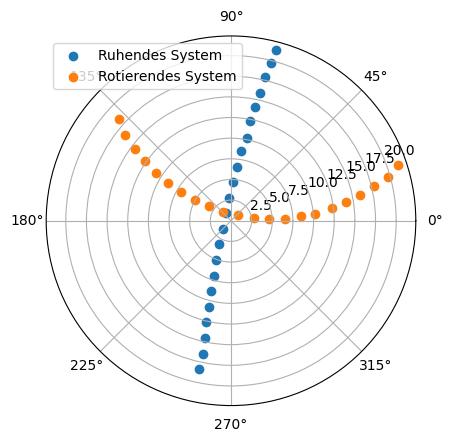

In [ ]:
# Daten aus CSV Datei einlesen, Spaltentitel Sind in Zeile 2, weil Python bei 0 anfängt
# zu zählen ist es also header=1

# Zeilen 3,4,5 (von 0 gezählt also 2,3,4) haben keine Daten sondern noch ein paar 
# Informationen von Measure Dynamics, also skiprows=[2,3,4]
b = pd.read_csv('15 upm tabelle 1 blaue kugel.csv', decimal=",", sep="\s+", 
                encoding="utf-16", header=1, skiprows=[2,3,4])
# Winkelgeschwindigkeit der Rotation
omega = 15 * 2*np.pi / 60
# Radius
b["r"] = np.sqrt(b["x"]**2 + b["y"]**2)
# Winkel phi
b["phi"] = np.arctan2(b["y"], b["x"])
# Winkel phi im rotierenden System
b["phi_c"] = b["phi"] + omega*b["t"]
# Polar plot
plt.figure()
ax15 = plt.subplot(polar=True)
ax15.scatter(b['phi'], b['r'], label="Ruhendes System")
ax15.scatter(b['phi_c'], b['r'], label="Rotierendes System")
ax15.legend()

# 30 rpm

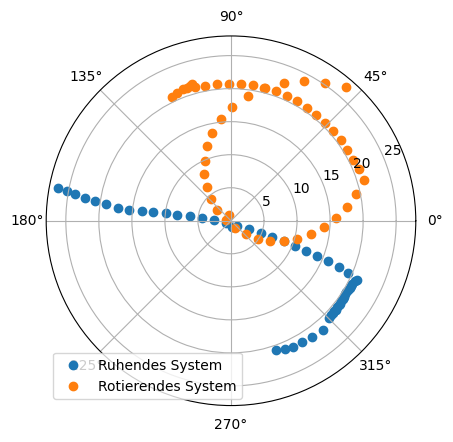

In [ ]:
b30 = pd.read_csv('30 upm tabelle 1 blaue kugel.csv', decimal=",", sep="\s+",
                  encoding="utf-16", header=1, skiprows=[2,3,4])
# add polar coordinates
omega30 = 30 * 2*np.pi / 60
b30["r"] = np.sqrt(b30["x"]**2 + b30["y"]**2)
b30["phi"] = np.arctan2(b30["y"], b30["x"])
b30["phi_c"] = b30["phi"] + omega30*b30["t"]
# Polar plot
plt.figure()
ax30 = plt.subplot(polar=True)
ax30.scatter(b30['phi'], b30['r'], label="Ruhendes System")
ax30.scatter(b30['phi_c'], b30['r'], label="Rotierendes System")
ax30.legend()

# 60 rpm

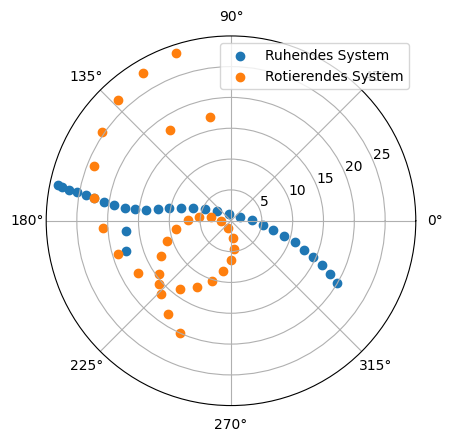

In [ ]:
b60 = pd.read_csv('60 upm tabelle 1 blaue kugel.csv', decimal=",", sep="\s+",
                  encoding="utf-16", header=1, skiprows=[2,3,4])
# add polar coordinates
omega60 = 60 * 2*np.pi / 60
b60["r"] = np.sqrt(b60["x"]**2 + b60["y"]**2)
b60["phi"] = np.arctan2(b60["y"], b60["x"])
b60["phi_c"] = b60["phi"] + omega60*b60["t"]
# Polar plot
plt.figure()
ax60 = plt.subplot(polar=True)
ax60.scatter(b60['phi'], b60['r'], label="Ruhendes System")
ax60.scatter(b60['phi_c'], b60['r'], label="Rotierendes System")
ax60.legend()